# 泰坦尼克号数据分析

## 清洗数据

In [52]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
data = pd.read_csv("泰坦尼克号.csv")

# 空值处理
data['Age'] = data['Age'].fillna(data['Age'].mean()).astype(np.int64)
data['Embarked'] = data['Embarked'].fillna({"Embarked":"S"},inplace=True)

# 删除无关列
data.drop(['Ticket'],axis='columns')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,None
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,NaN,None
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,B42,None
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,23.4500,NaN,None
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,C148,None


## 生还人数比例

342


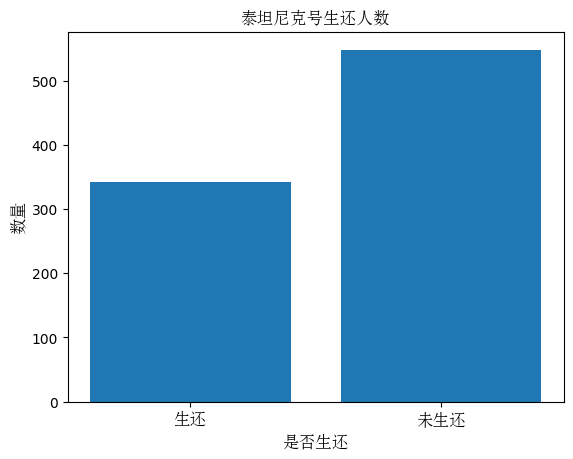

In [46]:
# 统计生还人数
survive_count = data[data["Survived"] == 1]['Survived'].count()
print(survive_count)
not_survive_count = data[data["Survived"] == 0]['Survived'].count()
# 绘制柱型图
font = fm.FontProperties(fname='simsun.ttc', size=12)
plt.bar(['生还', '未生还'], [survive_count, not_survive_count])
plt.title("泰坦尼克号生还人数", fontproperties=font)
plt.xlabel('是否生还', fontproperties=font)
plt.ylabel('数量', fontproperties=font)
# x轴显示中文
plt.xticks(fontproperties=font)
plt.show()


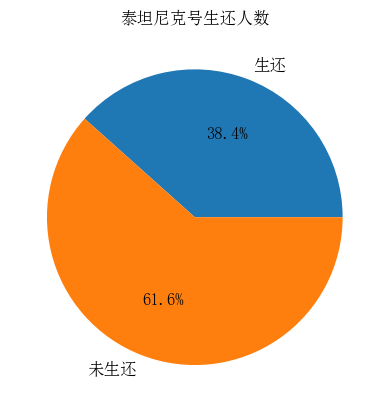

In [47]:
# 绘制饼状图
label = ['生还', '未生还']
sizes = [survive_count, not_survive_count]
plt.pie(sizes, labels=label, autopct='%1.1f%%',
        textprops={'fontproperties': font})
plt.title("泰坦尼克号生还人数", fontproperties=font)
plt.show()

## 泰坦尼克号乘客等级分布

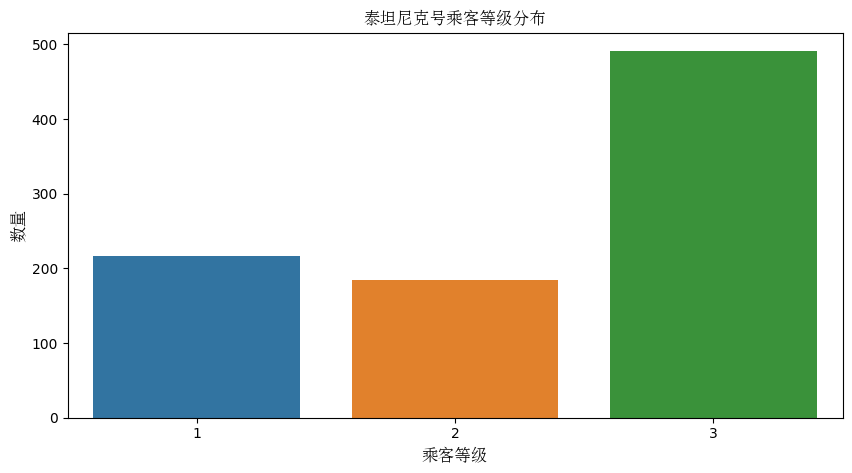

In [48]:
import seaborn as sns
data[['Survived', 'Pclass']].groupby(['Pclass']).count()
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=data)
plt.xlabel('乘客等级', fontproperties=font)
plt.ylabel('数量', fontproperties=font)
plt.title("泰坦尼克号乘客等级分布", fontproperties=font)
plt.show()

## 乘客等级与生还率的关系

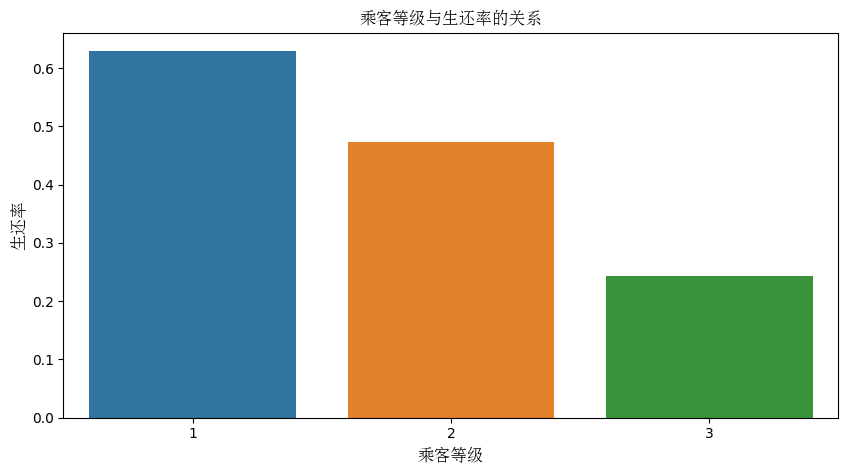

In [50]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', data=data, errorbar=None)
plt.title('乘客等级与生还率的关系',fontproperties=font)
plt.xlabel('乘客等级', fontproperties=font)
plt.ylabel('生还率', fontproperties=font)
plt.show()


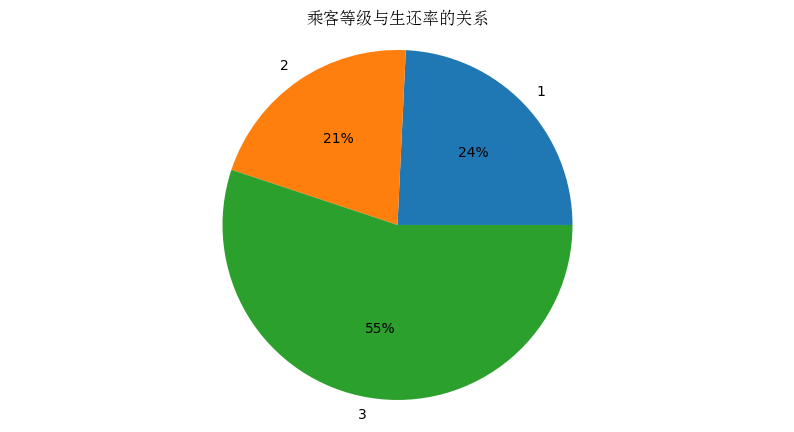

In [91]:
data.pivot_table(values='Name', index='Pclass', aggfunc='count')
plt.figure(figsize=(10, 5))  # 创建画布
temp = data[['Pclass', 'Name']].groupby(['Pclass']).count()
sum = temp.values[1][0] + temp.values[0][0]+temp.values[2][0]
plt.pie([temp.values[0][0]/sum, temp.values[1][0]/sum, temp.values[2]
        [0]/sum], labels=['1', '2', '3'], autopct='%1.0f%%')
plt.axis("equal")
plt.title('乘客等级与生还率的关系',fontproperties=font)
# 绘制标准的圆形图
plt.show()


## 性别与生还率的关系

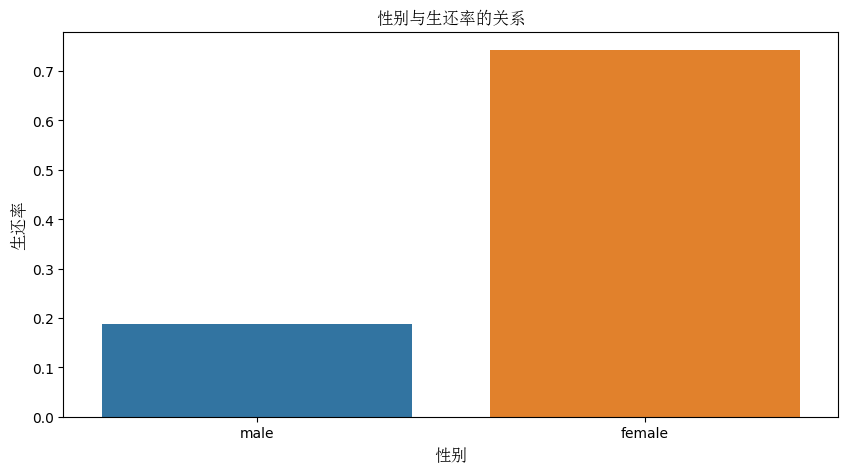

In [18]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="Sex",y="Survived",errorbar=None)
plt.title('性别与生还率的关系',fontproperties=font)
plt.xlabel('性别',fontproperties=font)
plt.ylabel('生还率',fontproperties=font)
plt.show()


## 年龄与生还率关系

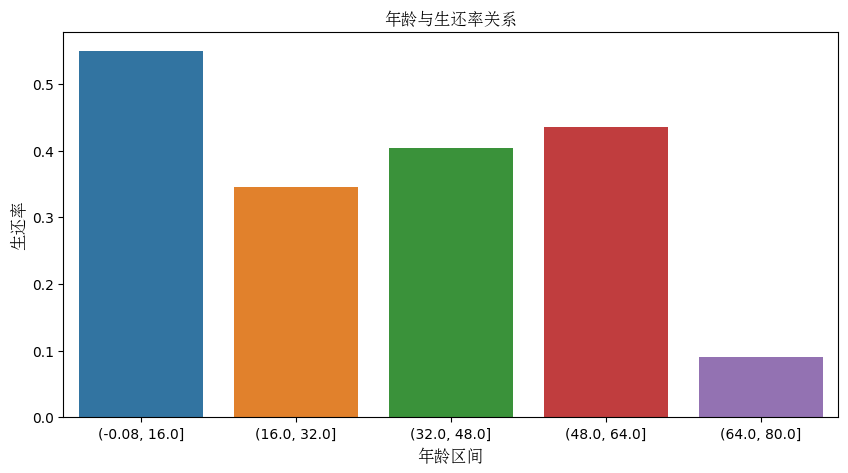

In [19]:
data['AgeGroup'] = pd.cut(data['Age'], 5)
data[['Survived', 'AgeGroup']].groupby(['AgeGroup']).count()
plt.figure(figsize=(10, 5))
sns.barplot(x='AgeGroup', y='Survived', data=data, errorbar=None)
plt.title("年龄与生还率关系", fontproperties=font)
plt.xlabel('年龄区间', fontproperties=font)
plt.ylabel('生还率', fontproperties=font)
plt.show()


## 兄弟姐妹及配偶的个数与生还率关系

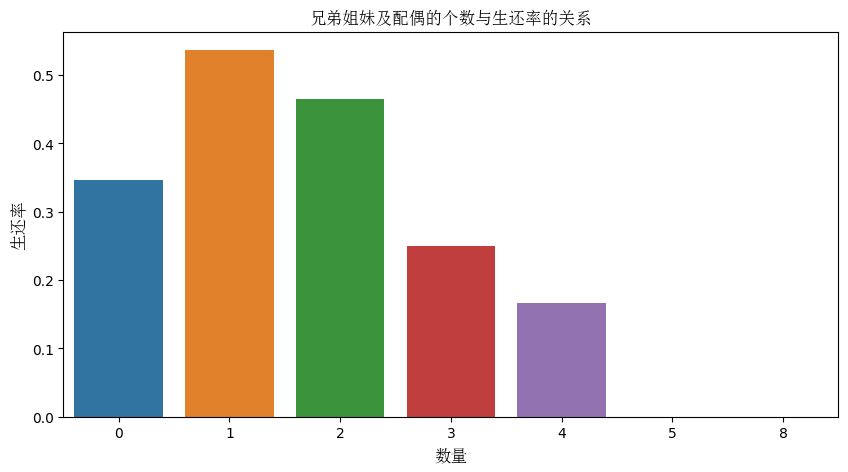

In [20]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="SibSp",y="Survived",errorbar=None)
plt.title('兄弟姐妹及配偶的个数与生还率的关系',fontproperties=font)
plt.xlabel('数量',fontproperties=font)
plt.ylabel('生还率',fontproperties=font)
plt.show()

## 父母或子女的个数与生还率关系

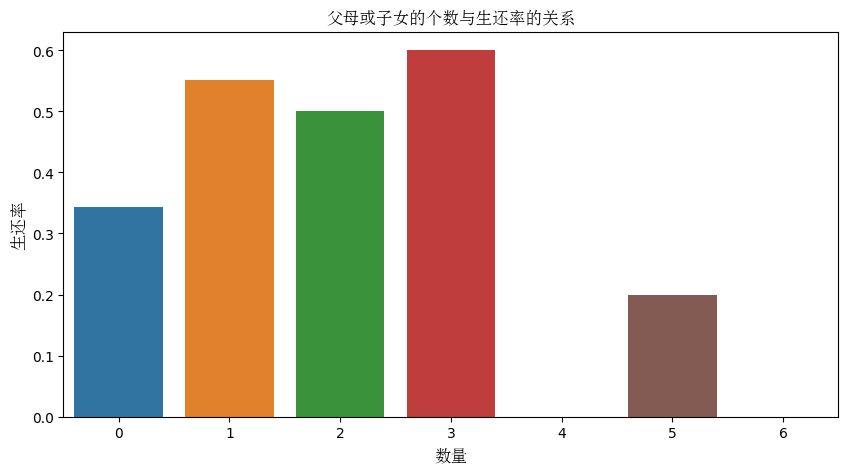

In [21]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="Parch",y="Survived",errorbar=None)
plt.title('父母或子女的个数与生还率的关系',fontproperties=font)
plt.xlabel('数量',fontproperties=font)
plt.ylabel('生还率',fontproperties=font)
plt.show()

## 船票价格与生还率关系

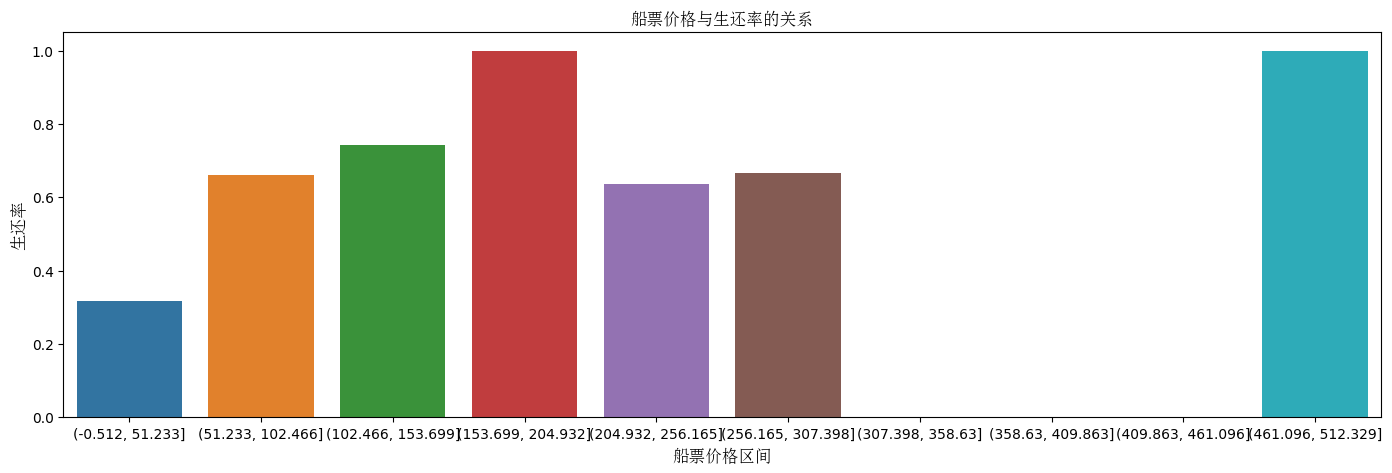

In [22]:
import seaborn as sns
data['FareGroup'] = pd.cut(data['Fare'], 10)
data[['Survived', 'FareGroup']].groupby(['FareGroup']).count()
plt.figure(figsize=(17,5))
sns.barplot(data=data,x="FareGroup",y="Survived",errorbar=None)
plt.title('船票价格与生还率的关系',fontproperties=font)
plt.xlabel('船票价格区间',fontproperties=font)
plt.ylabel('生还率',fontproperties=font)
plt.show()

## 舱位与生还率关系

In [30]:
import pandas as pd
data = pd.read_csv("泰坦尼克号.csv")
# 按照舱位分组，并计算生还率
survivors_by_class = data.groupby('Cabin')['Survived'].sum()
total_by_class = data.groupby('Cabin')['Survived'].count()
survival_rates = survivors_by_class / total_by_class
print(survival_rates)


Cabin
A10    0.0
A14    0.0
A16    1.0
A19    0.0
A20    1.0
      ... 
F33    1.0
F38    0.0
F4     1.0
G6     0.5
T      0.0
Name: Survived, Length: 147, dtype: float64


## 登陆口岸与生还率关系

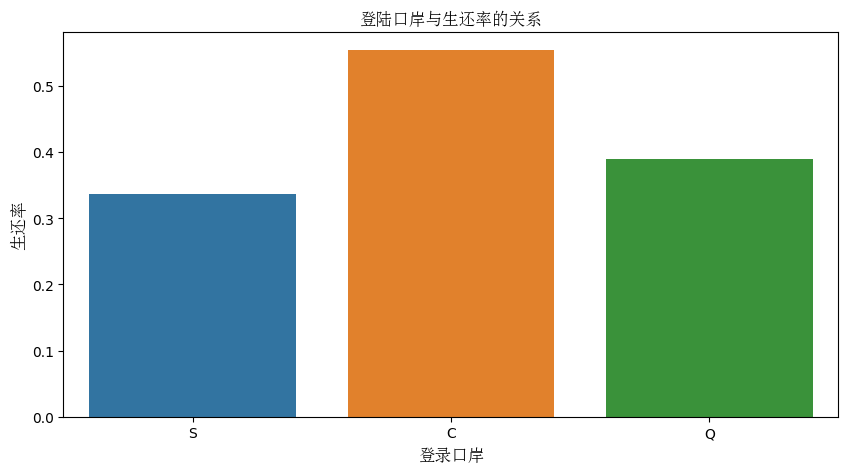

In [32]:
import seaborn as sns
import pandas as pd
data = pd.read_csv("泰坦尼克号.csv")
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="Embarked",y="Survived",errorbar=None)
plt.title('登陆口岸与生还率的关系',fontproperties=font)
plt.xlabel('登录口岸',fontproperties=font)
plt.ylabel('生还率',fontproperties=font)
plt.show()

# “链家”北京二手房数据分析

6.643967897040716
13.39655260342123
5.569620253164557
1.2234042553191489


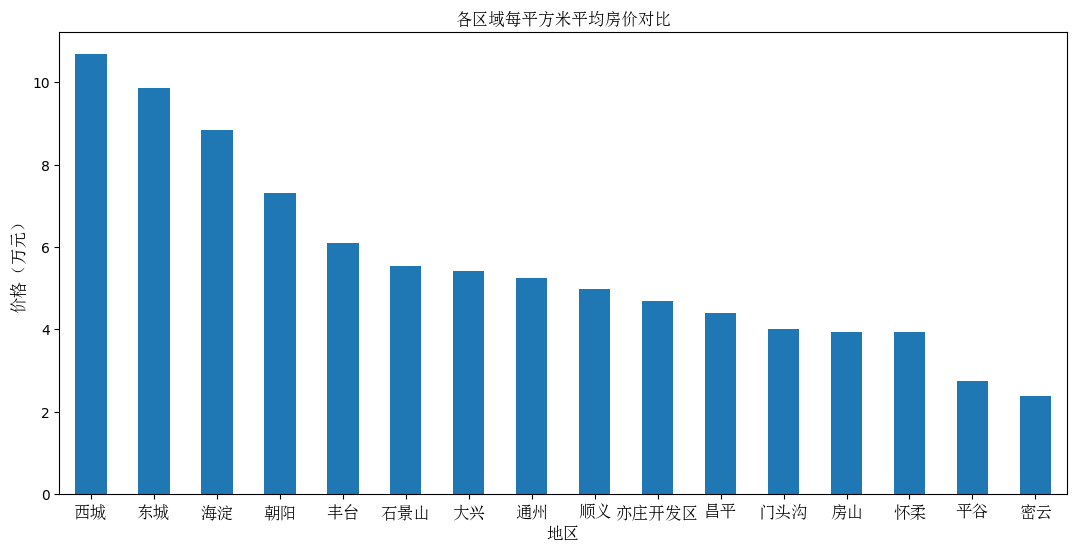

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn
data = pd.read_csv("lianjia.csv")
# 统计房屋总价
price_per_square = data['Price']/data['Size']
data['PricePerSquare'] = price_per_square
sum = price_per_square.sum()
# 平均数
average = sum/price_per_square.count()
print(average)
# 标准差
std_data = price_per_square.std()
print(std_data)
# 中位数
medium_data = price_per_square.median()
print(medium_data)
# 最小值
min_data = price_per_square.min()
print(min_data)

font = fm.FontProperties(fname='simsun.ttc', size=12)
# 每平方米平均房价数据
new_data = data.groupby('Region')['PricePerSquare']
# 各地区二手房数量
count_data = new_data.count()
new_data = new_data.sum()/new_data.count()
new_data = new_data.sort_values(ascending=False).reindex()
new_data.plot(kind='bar', x='Region',
              y='PricePerSquare', rot=0, figsize=(13, 6))
plt.title("各区域每平方米平均房价对比", fontproperties=font)
plt.xlabel('地区', fontproperties=font)
plt.ylabel('价格（万元）', fontproperties=font)
# x轴显示中文
plt.xticks(fontproperties=font)
plt.show()


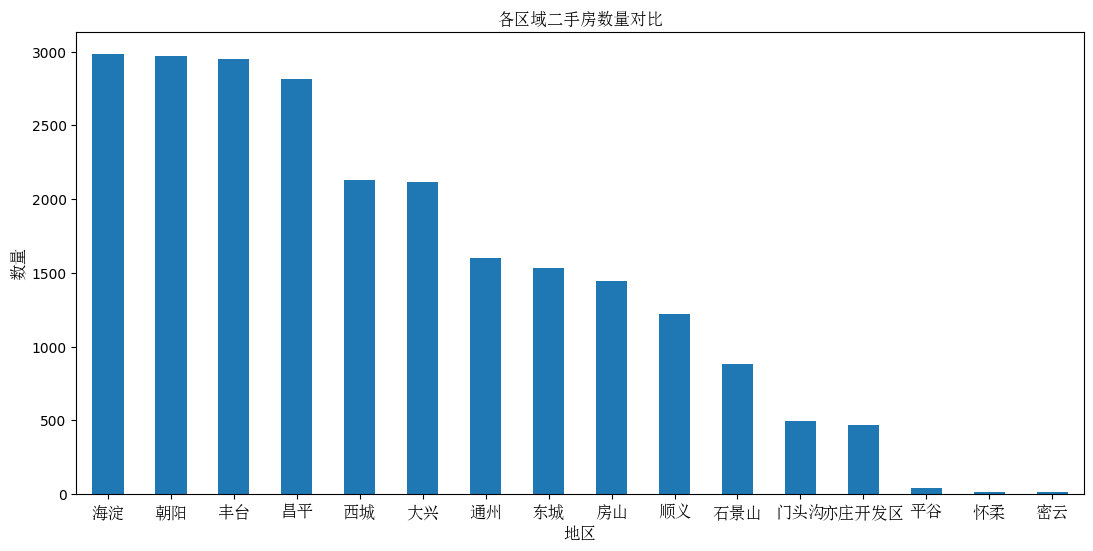

In [12]:
count_data = count_data.sort_values(ascending=False).reindex()
count_data.columns = ['Region','Count']
count_data.plot(kind='bar', x='Region',
              y='Count', rot=0, figsize=(13, 6))
plt.title("各区域二手房数量对比", fontproperties=font)
plt.xlabel('地区', fontproperties=font)
plt.ylabel('数量', fontproperties=font)
# x轴显示中文
plt.xticks(fontproperties=font)
plt.show()

/tmp/ipykernel_49311/1477309000.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value_counts.index, rug=True, kde=True, hist=True, color='blue')


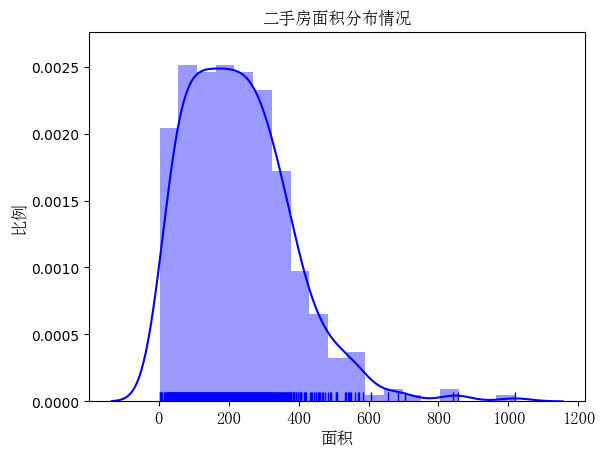

In [36]:
import seaborn as sns
value_counts = data['Size'].value_counts(normalize=True).apply(lambda x: '{:.2%}'.format(x))
sns.distplot(value_counts.index, rug=True, kde=True, hist=True, color='blue')
plt.title("二手房面积分布情况", fontproperties=font)
plt.xlabel('面积', fontproperties=font)
plt.ylabel('比例', fontproperties=font)
# x轴显示中文
plt.xticks(fontproperties=font)
plt.show()
